# Prep


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/github_drive/code

/content/drive/My Drive/github_drive/code


In [ ]:
# !ls

# Experiment

In [ ]:
import os
import sys
import numpy as np
import pandas as pd
from sklearn import metrics

import matplotlib.pyplot as plt


In [ ]:
# Merge all csv files with records of accuracy at different noise level and different explanations method
# classifiers_list = ['mrseql', 'rocket', 'weasel']
classifiers_list = ['mrseql', 'rocket']
def_noise_type_list = ['zero', 'gaussian_local', 'gaussian_global', 'mean_global', 'mean_local']
# def_noise_type_list = ['zero']
colnames = ['classifier','dataset', 'weights', 'type', 'noise_level', 'acc']
df = pd.DataFrame(columns=colnames)


# name by classifier
for classifier in classifiers_list:
    data = pd.read_csv('csvout/mean_local/acc_df_%s.csv' % classifier)
    # data = pd.read_csv('acc_df_%s.csv' % classifier)
    data['classifier'] = classifier
    
    df = pd.concat([df,data],ignore_index=True)

    df['classifier'] = df['classifier'].str.upper()
df = df.replace('MrSEQL', 'MrSEQL-SM')
df = df.replace('MRSEQL', 'MR-SEQL')
df = df.replace('ResNetCAM', 'ResNet-CAM')

df = df.rename(columns = {'dataset': 'Dataset', 'classifier': 'Classifier','weights':'Explanation Method', 'noise_type': 'Noise Type',
                     'acc': 'Accuracy', 'noise_level': 'Noise Level', 'type': 'Type 1/2'})

df = df[[
    'Dataset', 'Classifier', 'Explanation Method', 'Noise Type','Type 1/2' ,'Noise Level', 'Accuracy'
]]
# df = pd.read_csv('csvout/acc_df.csv')

In [ ]:
df

,Dataset,Classifier,Explanation Method,Noise Type,Type 1/2,Noise Level,Accuracy
0,CMJ,MR-SEQL,MrSEQL-SM,zero,1,0,0.9609
1,CMJ,MR-SEQL,MrSEQL-SM,zero,1,10,0.8939
2,CMJ,MR-SEQL,MrSEQL-SM,zero,1,20,0.7039
3,CMJ,MR-SEQL,MrSEQL-SM,zero,1,30,0.6648
4,CMJ,MR-SEQL,MrSEQL-SM,zero,1,40,0.5978
...,...,...,...,...,...,...,...
875,CMJ,ROCKET,Random,mean_local,2,60,0.6425
876,CMJ,ROCKET,Random,mean_local,2,70,0.6034
877,CMJ,ROCKET,Random,mean_local,2,80,0.5642
878,CMJ,ROCKET,Random,mean_local,2,90,0.4581


## 1. Exp 1: Evaluation of Informativeness

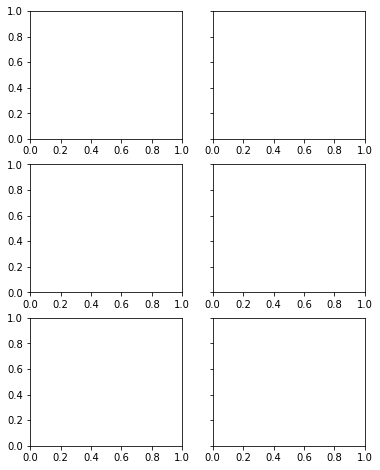

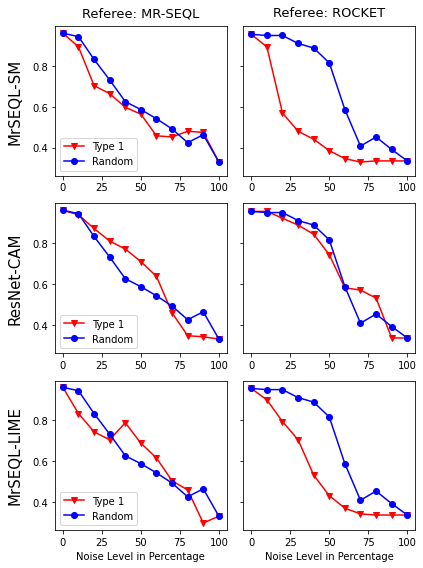

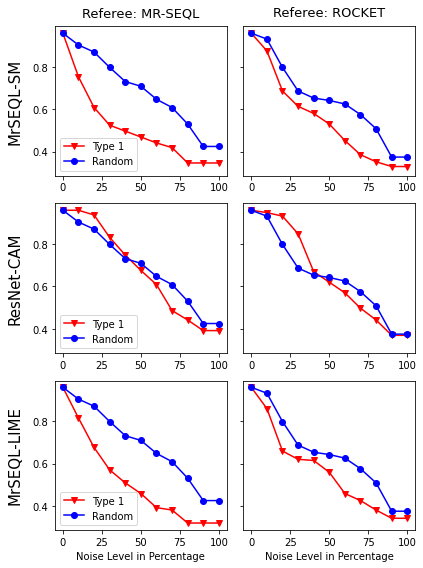

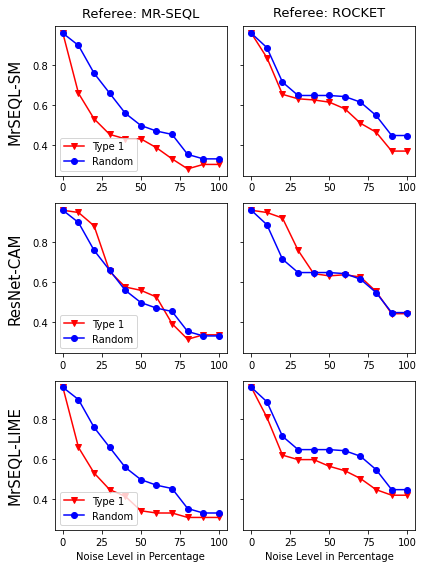

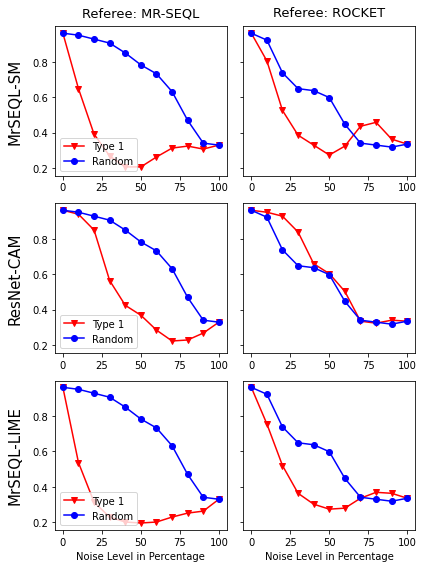

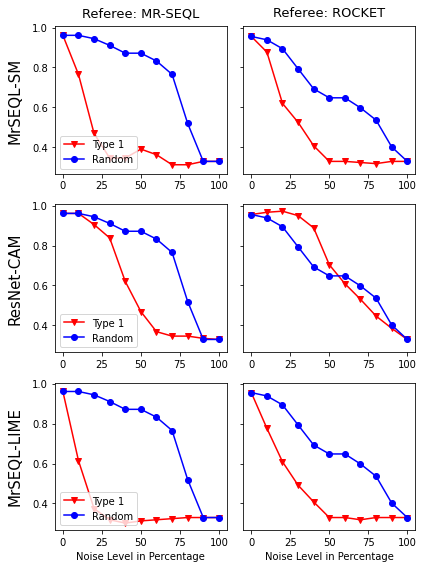

In [ ]:
# classifier_list = ['MR-SEQL','ROCKET', 'WEASEL']
classifier_list = ['MR-SEQL','ROCKET']
dataset = 'CMJ'
explanation_list = ['MrSEQL-SM', 'ResNet-CAM', 'MrSEQL-LIME']
random_sm = 'Random'
color_list = ['red','blue']
# noise = [1,2]
marker_list = ['v', 'o']

fig, axes = plt.subplots(nrows=len(explanation_list), ncols=len(classifier_list), sharex=False, sharey=True, figsize=(6,8))
color_list = ['red','blue']
noise = [1]
x = np.arange(0,101,10)

def_noise_type_list = ['zero', 'gaussian_local', 'gaussian_global', 'mean_global', 'mean_local']

for def_noise_type in def_noise_type_list:
    fig, axes = plt.subplots(nrows=len(explanation_list), ncols=len(classifier_list), sharex=False, sharey=True, figsize=(6,8))
    for i,explanation in enumerate(explanation_list):
        exp = [explanation,random_sm]
        for j,classifier in enumerate(classifier_list):
            assert len(classifier_list) >1
            for exp1, color, marker in zip(exp, color_list, marker_list):
                # print(def_noise_type, classifier, exp1,dataset)
                y = df[(df['Classifier'] == classifier) & 
                              (df['Explanation Method'] == exp1)& 
                              (df['Dataset'] == dataset) &
                              (df['Type 1/2'] == 1)&
                              (df['Noise Type'] == def_noise_type)]['Accuracy']
                # print(y)
                if len(explanation_list)>1: axes[i,j].plot(x,y,color=color, marker=marker)
                else: axes[j].plot(x,y, color = color, marker = marker)

            if len(explanation_list)>1:
                if i == 0: axes[i,j].set_title('Referee: %s' %classifier.upper(),  fontsize=13, pad = 10)
                if i == len(explanation_list)-1: axes[i,j].set_xlabel('Noise Level in Percentage')
                if j == 0: 
                    axes[i,j].set_ylabel('%s'% explanation, rotation=90, fontsize=15, labelpad=10)
                    axes[i,j].legend(['Type 1', 'Random'], loc='lower left')
            else:
                axes[j].set_title('Referee: %s' %classifier.upper(),  fontsize=13, pad = 10)
                axes[j].set_xlabel('Noise Level in Percentage')
                if j == 0:
                    axes[j].set_ylabel('%s'% explanation, rotation=90, fontsize=15, labelpad=10)
                    axes[j].legend(['Type 1', 'Random'], loc='lower left')

    plt.tight_layout()

    # plt.savefig('imgout/experiment1_summary_%s_%s.png' %(dataset,def_noise_type))


In [ ]:
df[(df['Classifier'] == classifier) & 
                          (df['Explanation Method'] == exp1)& 
                          (df['Dataset'] == dataset) &
                          (df['Type 1/2'] == 1)&
                          (df['Noise Type'] == def_noise_type)]
                          

,Dataset,Classifier,Explanation Method,Noise Type,Type 1/2,Noise Level,Accuracy
858,CMJ,ROCKET,Random,mean_local,1,0,0.9553
859,CMJ,ROCKET,Random,mean_local,1,10,0.9385
860,CMJ,ROCKET,Random,mean_local,1,20,0.8939
861,CMJ,ROCKET,Random,mean_local,1,30,0.7933
862,CMJ,ROCKET,Random,mean_local,1,40,0.6927
863,CMJ,ROCKET,Random,mean_local,1,50,0.6480
864,CMJ,ROCKET,Random,mean_local,1,60,0.6480
865,CMJ,ROCKET,Random,mean_local,1,70,0.5978
866,CMJ,ROCKET,Random,mean_local,1,80,0.5363
867,CMJ,ROCKET,Random,mean_local,1,90,0.4022


## 2. Exp 2: Compare explanations

### 2.1. Figure

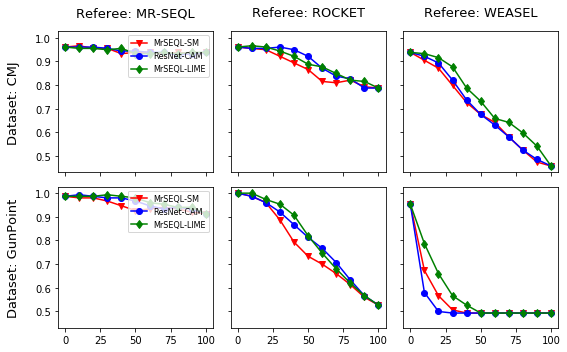

In [ ]:
classifier_list = ['MR-SEQL','ROCKET', 'WEASEL']
dataset_list = ['CMJ','GunPoint']
explanation_list = ['MrSEQL-SM', 'ResNet-CAM', 'MrSEQL-LIME']
color = ['red', 'blue', 'green']
# color = ['']
marker = ['v', 'o', 'd']
noise_type = 1


fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(8,5))

x = np.arange(0,101,10)
for i, dataset in enumerate(dataset_list):
    for j, classifier in enumerate(classifier_list):    
        for explanation, c, m in zip (explanation_list, color, marker):
            y = df[(df['Classifier'] == classifier) & 
                              (df['Explanation Method'] == explanation)& 
                              (df['Dataset'] == dataset) &
                              (df['Noise Type'] == noise_type)]['Accuracy']
            axes[i,j].plot(x,y, color=c, marker = m) 
#             axes[i,j].set_xticks(np.arange(0,110,10))
        if i ==0: 
#             axes[i,j].legend(['MrSEQL-SM', 'ResNet-CAM', 'MrSEQL-LIME'], loc='lower left', fontsize=8)
            axes[i,j].set_title('Referee: %s' %classifier.upper(), fontsize=13, pad = 15)
        
        if i == 2: axes[i,j].set_xlabel('Noise Level in Percentage')
        if j == 0: 
            axes[i,j].set_ylabel('Dataset: %s' %dataset, fontsize=13, labelpad=15)
            axes[i,j].legend(['MrSEQL-SM', 'ResNet-CAM', 'MrSEQL-LIME'], loc='upper right', fontsize=8)
            
plt.tight_layout()


if gaussian_noise: plt.savefig('imgout/experiment2_summary_figure_gaussian.png')
else: plt.savefig('imgout/experiment2_summary_figure_centroid.png')



### 2.2. AUC Table

In [ ]:
# LONG TABLE

colnames = ['dataset', 'weights', 'type', 'explanation_auc']
df = pd.DataFrame(columns=colnames)
# name by classifier
for classifier in ['mrseql', 'rocket', 'weasel']:
    if gaussian_noise: data = pd.read_csv('csvout/gaussian/auc_df_%s.csv' % classifier)
    else: data = pd.read_csv('csvout/centroid/auc_df_%s.csv' % classifier)
    data['classifier'] = classifier
    
    df = pd.concat([df,data],ignore_index=True)

df['classifier'] = df['classifier'].str.upper()
df = df.replace('MRSEQL', 'MR-SEQL')
df = df.replace('MrSEQL', 'MrSEQL-SM')
df = df.replace('ResNetCAM', 'ResNet-CAM')

df = df.rename(columns = {'dataset': 'Dataset', 'classifier': 'Classifier','weights':'Explanation Method',
                     'explanation_auc': 'Explanation AUC'})

df.head()

,Classifier,Dataset,Explanation AUC,type,Explanation Method
0,MR-SEQL,CBF,0.9991,1,MrSEQL-SM
1,MR-SEQL,CBF,0.9992,2,MrSEQL-SM
2,MR-SEQL,CBF,0.9993,1,ResNet-CAM
3,MR-SEQL,CBF,0.9988,2,ResNet-CAM
4,MR-SEQL,CMJ,0.9441,1,MrSEQL-SM


#### 2.2.1. Wide table for Experiment 1

In [ ]:
df1 = pd.pivot_table(df,index = ['Classifier', 'Dataset', 'Explanation Method'], columns = 'type', values = 'Explanation AUC').reset_index()
df1 = df1.rename(columns = {1: 'eAUC1', 2: 'eAUC2'})
df1 = df1[['Dataset', 'Explanation Method', 'Classifier','eAUC1','eAUC2']]
df1['Delta eAUC'] = df1['eAUC2'] - df1['eAUC1']
df1 = df1.round(4)
df1 = df1.sort_values(by=['Dataset', 'Explanation Method'])


df1 = df1[['Dataset', 'Explanation Method', 'Classifier', 'Delta eAUC']]
df1 = pd.pivot_table(df1, index = ['Dataset', 'Explanation Method'], columns = ['Classifier'], values = 'Delta eAUC').reset_index()
df1

if gaussian_noise: df1.to_csv('csvout/exp1_summary_gaussian_temp.csv', index = False)
else: df1.to_csv('csvout/exp1_summary_centroid_temp.csv', index = False)

#### 2.2.1. Wide table for Experiment 2

In [ ]:
ds_list = ['CBF', 'CMJ', 'Coffee', 'ECG200', 'GunPoint']
colnames = ['Dataset', 'Classifier', 'MrSEQL-LIME', 'MrSEQL-SM', 'ResNet-CAM']
df2 = pd.DataFrame(columns=colnames)

for dataset in ds_list:
    data
    data = df[(df['type'] == 1) & (df['Dataset'] == dataset)]
    data = data.pivot(index = 'Classifier', columns = 'Explanation Method', values = 'Explanation AUC').reset_index()
    data['Dataset'] = dataset
#     data = data[['Dataset','Classifier', 'MrSEQL-LIME', 'MrSEQL-SM', 'ResNetCAM']]
    df2 = pd.concat([df2,data],ignore_index=True)

df2 = df2[['Dataset','Classifier', 'MrSEQL-SM', 'ResNet-CAM', 'MrSEQL-LIME']]
df2 = df2.round(4)

df2.head()

if gaussian_noise: df2.to_csv('csvout/exp2_summary_gaussian.csv', index = False)
else: df2.to_csv('csvout/exp2_summary_centroid.csv', index = False)


## 3. Saliency Maps

In [ ]:
import utils.visualize as vis
import utils.prep as prep
from sklearn import preprocessing
ds_dir = '/Users/trang/Google Drive/github/data'


In [ ]:
def plot_time_series_with_color(ts, label, weight, i, dataset = 'CMJ', save = False, 
                                explantion_method = 'MrSEQL-SM'):
    assert i>=0
    ts = ts[i]
    metats = weight[i]
    cas = metats
    
    def transform(X):
        ma,mi = np.max(X), np.min(X)
        X = (X - mi)/(ma-mi)
        return X*100
    cas = transform(cas)

    max_length1, max_length2 = len(metats),10000 #
    x1 = np.linspace(0,max_length1,num = max_length1)
    x2 = np.linspace(0,max_length1,num = max_length2)
    y1 = ts
    f = interp1d(x1, y1)

    fcas = interp1d(x1, cas)
    cas = fcas(x2)

    plt.figure(figsize = (5,3.5))
    
    plt.scatter(x2,f(x2), c = cas, cmap = 'jet', marker='.', s= 1,vmin=0,vmax = 100)
    plt.title('Dataset %s, Explanation for Test Example %d (Class %d) by method %s' %(dataset,i,label[i], explanation_method))   
    plt.title('Method: %s' % explanation_method,fontsize=20)
#     cbar = plt.colorbar()
    if save: plt.savefig('imgout/SM_%s_%s_Class%d_idx%d.png' %(dataset, explanation_method, label[i],i))

        

def get_explanation_weight(explanation_method, ds):
    test_file  = os.path.join(ds_dir, ds, ds+'_TEST')
    test_data = np.genfromtxt(test_file, delimiter=',')
    test_x, test_y  = test_data[:,1:], test_data[:,0]
    
    if explanation_method == 'MrSEQL-SM':        explanation_weight_file = 'output/explanation_weight/weights_MrSEQL_%s.txt' % ds
    elif explanation_method == 'MrSEQL-LIME':    explanation_weight_file = 'output/explanation_weight/weights_LIME_%s.txt' % ds
    elif explanation_method == 'ResNet-CAM':      explanation_weight_file = 'output/resnet_weights/ResNet_%s_BestModel.hdf5_model_weights.txt' % ds
    else: 
        print('ERROR')
    explanation_weight = np.genfromtxt(explanation_weight_file, delimiter = ',')
    if explanation_method =='MrSEQL-LIME': 
        repeat_times = test_x.shape[1]//10
        explanation_weight = np.repeat(explanation_weight, repeat_times).reshape(test_y.shape[0],-1)
#     explanation_weight = abs(explanation_weight)
    return explanation_weight
    

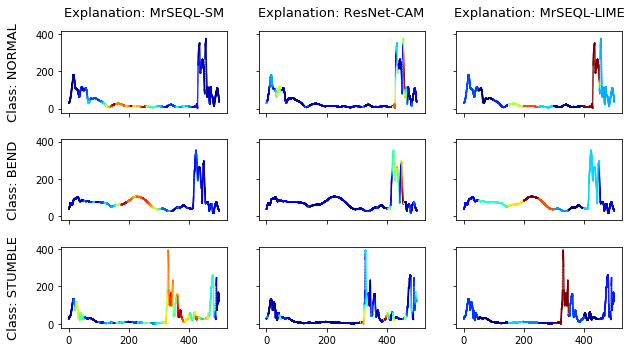

In [ ]:
ds = 'CMJ'
explanation_method_li = ['MrSEQL-SM','ResNet-CAM', 'MrSEQL-LIME']
example_li  =  [18,70,150]
# example_li = [10,50]
# example_li = [60]


test_file  = os.path.join(ds_dir, ds, ds+'_TEST')
test_data = np.genfromtxt(test_file, delimiter=',')
test_x, test_y  = test_data[:,1:], test_data[:,0]

le = preprocessing.LabelEncoder()
le.fit(test_y)
transformed_test_y = le.transform(test_y)
n_class = np.unique(transformed_test_y).shape[0]
class_label = ['NORMAL', 'BEND', 'STUMBLE']

fig, axes = plt.subplots(nrows=n_class, ncols=3, sharex=True, sharey=True, figsize=(9,5))


for j, explanation_method in enumerate(explanation_method_li):
    explanation_weight = get_explanation_weight(explanation_method, ds = ds)   
    for i, idx in enumerate(example_li):       
        ts = test_x[idx]
        weight = abs(explanation_weight[idx])
        
        def transform(X):
            ma,mi = np.max(X), np.min(X)
            X = (X - mi)/(ma-mi)
            return X*100
        weight = transform(weight)

        max_length1, max_length2 = len(metats),10000 #
        x1 = np.linspace(0,max_length1,num = max_length1)
        x2 = np.linspace(0,max_length1,num = max_length2)
        y1 = ts
        
        f = interp1d(x1, y1) # interpolate time series
        fcas = interp1d(x1, weight) # interpolate weight color
        weight = fcas(x2) # convert vector of original weight vector to new weight vector

        axes[i,j].scatter(x2,f(x2), c = weight, cmap = 'jet', marker='.', s= 1,vmin=0,vmax = 100)
        
        if j ==0: axes[i,j].set_ylabel('Class: %s' %class_label[i], fontsize=13, labelpad = 15)
        if i == 0: axes[i,j].set_title('Explanation: %s' %explanation_method, fontsize=13, pad=15)
            
plt.tight_layout()

plt.savefig('imgout/sanity_summary_figure.png')

